<a href="https://colab.research.google.com/github/thoriqakhdn/K-means/blob/master/Case_Based2_Kmeans_1301204031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [369]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # untuk Evaluasi
import random as rd
import seaborn as sns
import numpy as np
import math

In [372]:
df_train = pd.read_csv('https://github.com/thoriqakhdn/K-means/blob/master/water-treatment.data?raw=true')
df_train

,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?.4,58.8,95.5,?.5,70.0,?.6,79.4,87.3,99.6
0,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
1,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
2,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
3,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
4,D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,...,1764,?,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
522,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
523,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
524,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [209]:
df_train.shape

(526, 39)

Eksplorasi Data

In [210]:
df_train.describe()

,7.8,2110,7.9,228,2120,7.9.1,2010
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,7.810076,1477.420152,7.829848,254.001901,1494.847909,7.811787,1489.581749
std,0.246409,394.310441,0.227120,147.594483,402.048938,0.199747,399.728036
min,6.900000,651.000000,7.300000,104.000000,646.000000,7.100000,85.000000
25%,7.600000,1200.500000,7.700000,184.000000,1217.000000,7.700000,1223.750000
50%,7.800000,1405.500000,7.800000,220.000000,1419.000000,7.800000,1427.500000
75%,8.000000,1672.000000,8.000000,272.000000,1708.750000,7.900000,1696.500000
max,8.700000,3230.000000,8.500000,1692.000000,3170.000000,8.400000,3690.000000


In [211]:
# Mengecek data apakah ada yang null atau tidak 
df_train.isnull().any()

D-1/3/90    False
44101       False
1.50        False
7.8         False
?           False
407         False
166         False
66.3        False
4.5         False
2110        False
7.9         False
?.1         False
228         False
70.2        False
5.5         False
2120        False
7.9.1       False
?.2         False
280         False
94          False
72.3        False
0.3         False
2010        False
7.3         False
?.3         False
84          False
21          False
81.0        False
0.02        False
2000        False
?.4         False
58.8        False
95.5        False
?.5         False
70.0        False
?.6         False
79.4        False
87.3        False
99.6        False
dtype: bool

In [212]:
# Mengecek data duplikat 
df_train.duplicated().any()

False

Mengisi data yang kosong dengan mean

In [355]:
df_train = df_train.apply(pd.to_numeric, errors='coerce')

df_train = df_train.fillna(df_train.mean())
df_clean = df_train.to_numpy()

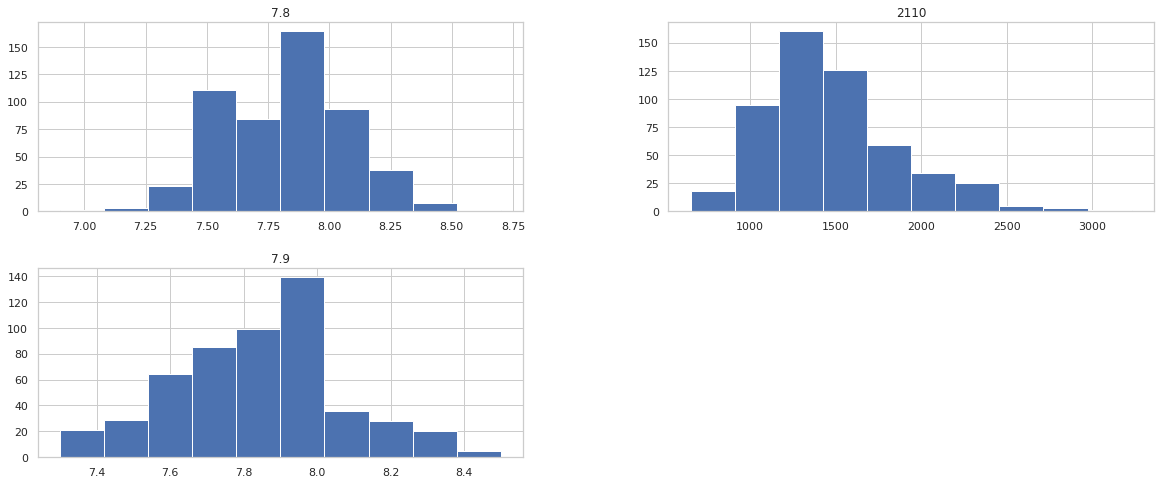

In [354]:
# Histogram untuk range nilai tiap column
hist = df_train_outlier.hist(figsize = (20, 8))

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5]),
 <a list of 39 Text major ticklabel objects>)

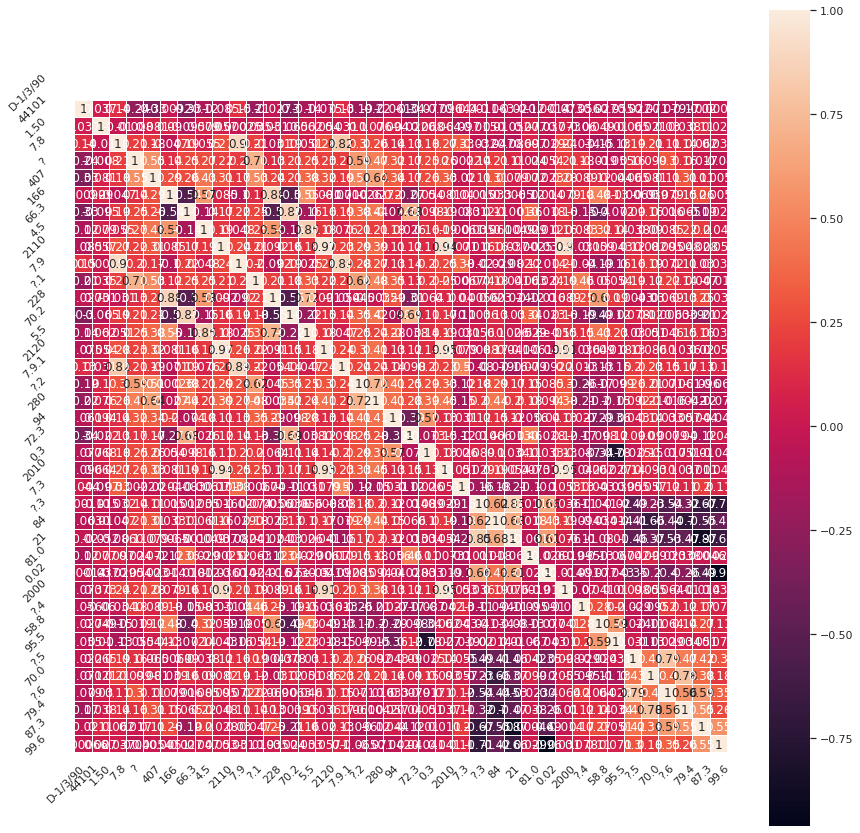

In [215]:
# buat correlation heatmap agar mengetahui keterhubungan semua data
corr = df_train.select_dtypes(include = ['float64', 'int64']).iloc[:,:].corr()
plt.figure(figsize=(15, 15))

ax = sns.heatmap(corr, vmax = 1, linewidth = 0.01, linecolor = "white", square = True, annot = True)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

Dapat dilihat terdapat beberapa korelasi yang kuat dan tidak

Preprocessing Data

In [373]:
# Hapus Data 
data = df_train.drop(['D-1/3/90','?', '?.1', '?.2','?.3','?.4','?.5','?.6','44101','2000','407','4.5','0.02','95.5'
,'99.6','1.50','5.5','0.3','84','21','81.0','79.4','70.0','70.2','66.3','72.3','87.3','58.8','7.3','280','166'], axis=1)
data

,7.8,2110,7.9,228,2120,7.9.1,94,2010
0,7.7,2660,7.7,244,2570,7.6,96,2700
1,7.6,1666,7.7,220,1594,7.7,92,1742
2,7.9,2430,7.8,268,2280,7.8,96,2060
3,8.0,2110,7.9,236,2020,7.8,88,2250
4,7.8,1644,7.8,248,1762,7.7,100,1768
...,...,...,...,...,...,...,...,...
521,7.7,894,7.7,146,873,7.7,55,915
522,7.8,988,7.8,192,991,7.7,80,966
523,7.4,1060,7.5,200,1040,7.6,70,1152
524,7.3,1260,7.4,226,1198,7.5,77,1351


Dilakukan pengecekan outliers

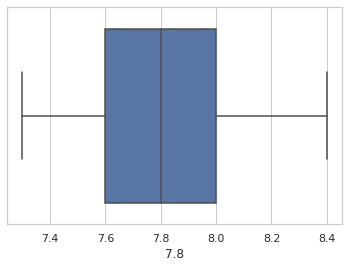

In [378]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["7.8"])

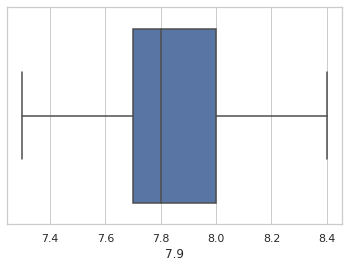

In [377]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["7.9"])

In [376]:
def outlier(data):
  q1 = data.quantile(0.3)
  q3 = data.quantile(0.8)

  IQR = q3 - q1
  LB = q1 - (IQR * 1.5)
  UB = q3 + (IQR * 1.5)
  dataF = data[((data>LB) & (data<UB))]
  return dataF

dataFix = data

data['7.9'] = outlier(dataFix['7.9'])
data['7.8'] = outlier(dataFix['7.8'])
data

,7.8,2110,7.9,228,2120,7.9.1,94,2010
0,7.7,2660,7.7,244,2570,7.6,96,2700
1,7.6,1666,7.7,220,1594,7.7,92,1742
2,7.9,2430,7.8,268,2280,7.8,96,2060
3,8.0,2110,7.9,236,2020,7.8,88,2250
4,7.8,1644,7.8,248,1762,7.7,100,1768
...,...,...,...,...,...,...,...,...
521,7.7,894,7.7,146,873,7.7,55,915
522,7.8,988,7.8,192,991,7.7,80,966
523,7.4,1060,7.5,200,1040,7.6,70,1152
524,7.3,1260,7.4,226,1198,7.5,77,1351


In [379]:
data = data[['7.9','7.8']]

Normalisasi

In [380]:
ss = StandardScaler()
data_scaled = ss.fit_transform(data)

In [381]:
data = pd.DataFrame(data_scaled, columns = data.columns)
data.head()

,7.9,7.8
0,-0.570856,-0.478370
1,-0.570856,-0.904316
2,-0.126857,0.373522
3,0.317142,0.799467
4,-0.126857,-0.052424


In [382]:
data = data.dropna(how='any')
data

,7.9,7.8
0,-0.570856,-0.478370
1,-0.570856,-0.904316
2,-0.126857,0.373522
3,0.317142,0.799467
4,-0.126857,-0.052424
...,...,...
521,-0.570856,-0.478370
522,-0.126857,-0.052424
523,-1.458855,-1.756207
524,-1.902855,-2.182153


K-MEANS

In [364]:
def euclidean_distc(x, y):
  i = 0
  j = 0

  while(i < len(y)):
    j = j + ((x[i] - y[i]) * (x[i] - y[i]))
    i = i + 1
  return math.sqrt(j)


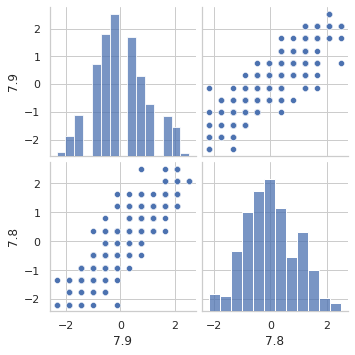

In [365]:
sns.pairplot(data)

In [366]:
def kmeans(data, mult, max_iterasi):
  cluster = []
  centroid = []

  cen = [data[np.random.randint(0, len(data))] for x in range(mult)]

  for i in range(max_iterasi):
    for m in range(len(data)):
      temp = [euclidean_distc(cen[j], data[m]) for j in range(mult)]
      mo = min(temp)
      idx = temp.index(mo)
      cluster.append([data[m], idx])
    for m in range(mult):
      cenX = [x[0][0] for x in cluster if x[1]==m]
      cenY = [x[0][1] for x in cluster if x[1]==m]
      centroid.append([sum(cenX)/len(cenX), sum(cenY)/len(cenY)])
    if cen == centroid:
      break
    cen = centroid[:]
    centroid.clear()
    cluster.clear()
  return cluster, cen


In [367]:
def showPlot(cluster, centroid):
  k = 3
  plt.subplots(figsize=(10, 10))

  for i in range(k):
    plt.scatter([j[0][0] for j in cluster if j[1] == i],
                [j[0][1] for j in cluster if j[1] == i])
  
  for i in range(k):
    plt.scatter([j[0] for j in centroid],
                [j[1] for j in centroid], s=299, color='Red')

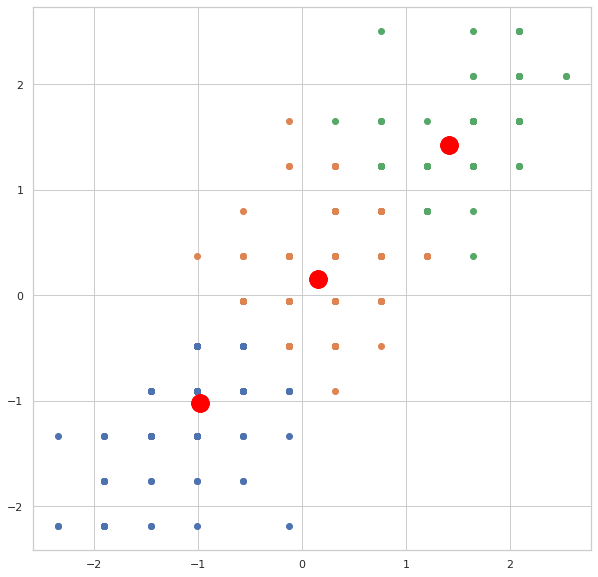

In [368]:
mult = 3
max_iterasi = 10
data = data.to_numpy()
data = data.tolist()
clus, cen = kmeans(data, mult, max_iterasi)
showPlot(clus, cen)

In [320]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

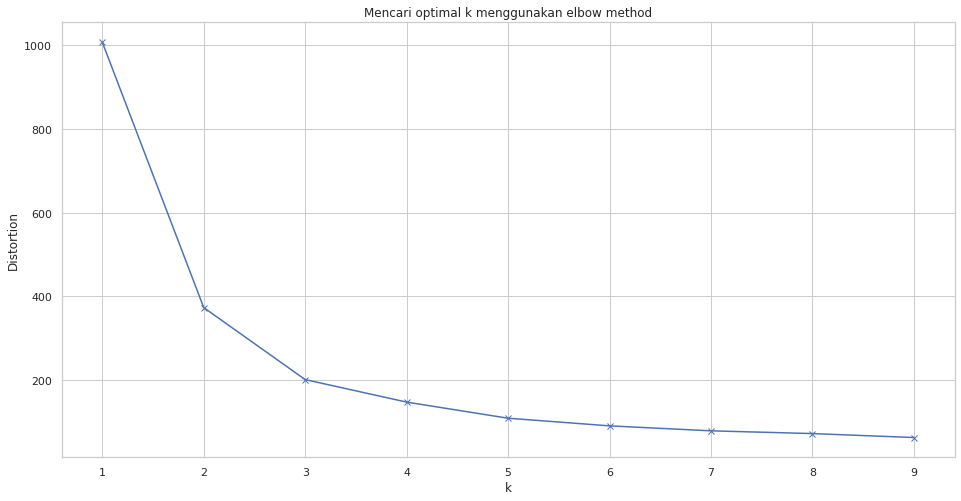

In [321]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Mencari optimal k menggunakan elbow method')
plt.show()